In [1]:
#Import API
from dora.api import DataExplorer

import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

explorer = DataExplorer()

In [2]:
def plot3d(X,x,y,z,points):
    fig = pyplot.figure()
    ax = Axes3D(fig)
    colors = ['green','red','blue','black','salmon','indigo','plum','seagreen','grey','yellow']
    for i in range(points):
        ax.scatter(X.results[i][x], X.results[i][y],X.results[i][z], c=colors[X.results[i][10]])
    return fig

In [3]:
def prodPerCluster(df):
    fig=plt.figure()
    maxn=df['cluster'].max()
    plt.hist(df['cluster'].values)
    plt.xlabel('Products')
    plt.ylabel('# of Products')
    plt.xticks(range(0,maxn+1))
    plt.title('Number of Products per Cluster')
    return fig

In [4]:
def clusterDist(df):
    maxn=df['cluster'].max()
    clusterStats=pd.DataFrame()
    for i in range(maxn+1):
        mask=(df['cluster']==i)
        t=df.loc[mask]
        clusterStats.loc[i,'avgNumOrders']=t['numorders'].mean()
        clusterStats.loc[i,'avgRating']=t['avgrating'].mean()
        clusterStats.loc[i,'numCategories']=t['category'].nunique()
        clusterStats.loc[i,'avgDays_on_sale']=t['days_on_sale'].mean()
        clusterStats.loc[i,'avgSpringSales']=t['spring_sales'].mean()
        clusterStats.loc[i,'avgSummerSales']=t['summer_sales'].mean()
        clusterStats.loc[i,'avgFallSales']=t['fall_sales'].mean()
        clusterStats.loc[i,'avgWinterSales']=t['winter_sales'].mean()
    return clusterStats

Look at the statsByProduct to see the distribution of number of orders per product

In [5]:
prodStats=explorer.products.statsByProduct()
statsByProd=pd.DataFrame(prodStats.results, columns=prodStats.columns)

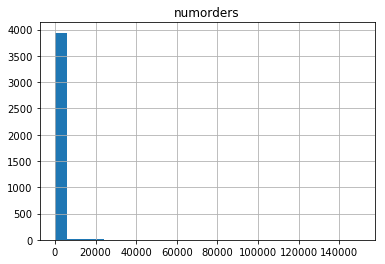

In [6]:
plt.figure()
statsByProd.hist(column='numorders', bins=25)
plt.show()

In [7]:
print('Percentage of products that have been ordered 50 times or less '+ str(
      (statsByProd.loc[statsByProd['numorders']<=50]['numorders'].count()/statsByProd.shape[0])*100))

Percentage of products that have been ordered 50 times or less 76.7552657974


In [8]:
print('Percentage of products that have been ordered over 50 times '+ str(
      (statsByProd.loc[statsByProd['numorders']>50]['numorders'].count()/statsByProd.shape[0])*100))

Percentage of products that have been ordered over 50 times 23.2447342026


Break up the clustering of the products into two groups based on the number of orders. 
Group 1: Less than 50 total orders
Group 2: More than 50 total orders

Group 1 Clustering:

In [9]:
group1_asin=statsByProd.loc[statsByProd['numorders']<=50]['asin'].values

In [10]:
group1stats=explorer.products.statsByProduct(asin=group1_asin)

In [56]:
group1clust=explorer.products.clusterProducts(feature_set=group1stats,n_clusters=7,
                                              cluster_on=['numorders','days_on_sale','spring_sales'],
                                              random_state=1)

In [57]:
group1_df=pd.DataFrame(group1clust.results, columns=group1clust.columns)
group1_df.head()

,numorders,days_on_sale,spring_sales,productid,asin,avgrating,category,summer_sales,fall_sales,winter_sales,cluster
0,34.0,445.0,0.0,10004,0000015393,4.0000000000000000,720870,24,9,1,6
1,49.0,1028.0,5.0,10009,0000174076,5.0000000000000000,4539344011,9,3,32,0
2,18.0,1230.0,3.0,10013,0000477141,1.00000000000000000000,15762881,1,6,8,5
3,36.0,1141.0,0.0,10014,000047715X,4.6666666666666667,3564987011,1,2,3,5
4,17.0,1159.0,2.0,10015,0000619574,3.0000000000000000,15762891,1,6,8,5


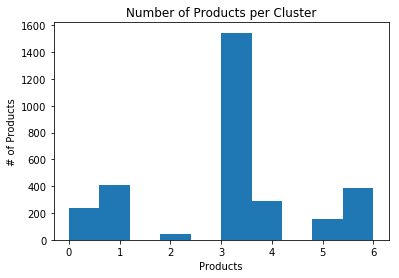

In [58]:
group1_prod_per_clust=prodPerCluster(group1_df)
group1_prod_per_clust

In [59]:
group1_dist=clusterDist(group1_df)
group1_dist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales
0,16.712500,4.299811,231.0,922.995833,3.041667,2.750000,2.800000,4.304167
1,10.799020,4.255562,399.0,205.058824,1.671569,1.580882,0.850490,1.350490
2,25.627907,4.384718,43.0,1947.813953,4.279070,4.697674,5.232558,7.953488
3,5.552461,4.267433,1417.0,11.750648,0.539508,0.613990,0.313472,0.505829
4,12.101399,4.244381,272.0,667.762238,1.548951,1.688811,1.741259,2.797203
5,19.797386,4.372287,151.0,1238.143791,3.359477,3.052288,3.006536,4.725490
6,11.702842,4.261549,378.0,417.899225,1.984496,1.648579,1.441860,2.343669


In [60]:
group1clust.columns

array(['numorders', 'days_on_sale', 'spring_sales', 'productid', 'asin',
       'avgrating', 'category', 'summer_sales', 'fall_sales',
       'winter_sales', 'cluster'], dtype=object)

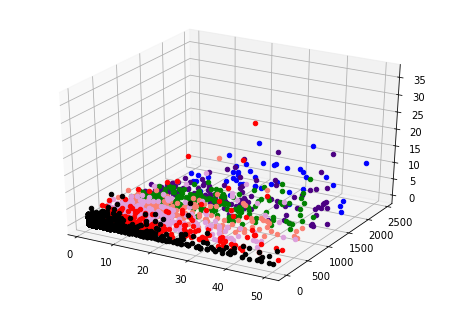

In [61]:
plot=plot3d(group1clust, 0, 1, 2, 3000)
plot

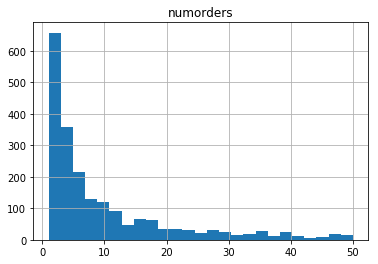

In [28]:
test=group1_df[group1_df['cluster']==4]
test.head()

,numorders,avgrating,category,days_on_sale,spring_sales,summer_sales,fall_sales,winter_sales,productid,asin,cluster
44,1,5.0000000000000000,11357541011,0.0,0,1,0,0,10060,0001374400,4
79,15,5.0000000000000000,11764635011,1134.0,1,4,0,1,10108,0001841777,4
148,41,5.0000000000000000,10095049011,1304.0,7,13,13,8,10203,0002007681,4
149,13,5.0000000000000000,10099177011,701.0,4,5,3,1,10205,0002007827,4
150,45,4.0000000000000000,10099181011,1473.0,9,14,6,16,10206,0002007843,4


Group 2 Clustering:

In [62]:
group2_asin=statsByProd.loc[statsByProd['numorders']>50]['asin'].values

In [63]:
group2stats=explorer.products.statsByProduct(asin=group2_asin)

In [83]:
group2clust=explorer.products.clusterProducts(feature_set=group2stats,n_clusters=3,
                                              cluster_on=['numorders','days_on_sale','spring_sales'],
                                              random_state=1)

In [84]:
group2_df=pd.DataFrame(group2clust.results, columns=group2clust.columns)
group2_df.head()

,numorders,days_on_sale,spring_sales,productid,asin,avgrating,category,summer_sales,fall_sales,winter_sales,cluster
0,512.0,629.0,155.0,10001,0000000116,2.5000000000000000,1,46,40,15,0
1,230.0,277.0,5.0,10002,0000000868,4.0000000000000000,173508,2,1,222,0
2,2408.0,118.0,0.0,10003,0000013714,4.2857142857142857,266162,0,65,107,0
3,8480.0,1501.0,442.0,10005,0000029831,4.8000000000000000,3564986011,330,378,553,0
4,3048.0,685.0,150.0,10006,0000038504,4.5000000000000000,882340,22,263,1089,0


/Users/laurawilke/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


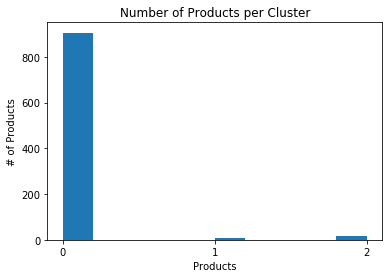

In [85]:
group2_prod_per_clust=prodPerCluster(group2_df)
group2_prod_per_clust

In [86]:
group2_dist=clusterDist(group2_df)
group2_dist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales
0,838.123757,4.250806,876.0,775.492818,42.309392,46.969061,58.218785,93.637569
1,91847.833333,4.438360,6.0,658.166667,514.666667,927.500000,1243.166667,1499.333333
2,31574.250000,4.428401,16.0,724.062500,197.437500,406.750000,476.187500,546.625000


In [87]:
group2clust.columns

array(['numorders', 'days_on_sale', 'spring_sales', 'productid', 'asin',
       'avgrating', 'category', 'summer_sales', 'fall_sales',
       'winter_sales', 'cluster'], dtype=object)

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


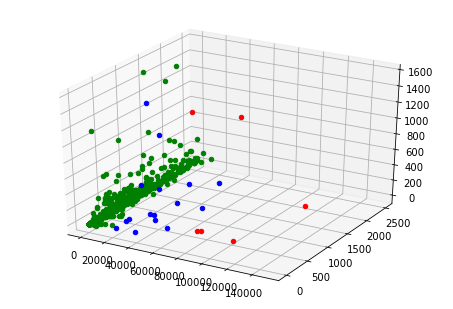

In [88]:
plot=plot3d(group2clust, 0, 1, 2, 927)
plot

Elimiate Group 2 Cluster 1 and Group 2 Cluster 2 and foucs on clustering Group 2 Cluster 0

In [89]:
group2c0_asin=group2_df.loc[group2_df['cluster']==0]['asin'].values

In [90]:
group2c0stats=explorer.products.statsByProduct(asin=group2c0_asin)

In [91]:
group2c0clust=explorer.products.clusterProducts(feature_set=group2c0stats,n_clusters=7,
                                              cluster_on=['numorders','days_on_sale','spring_sales'],
                                              random_state=1)

In [92]:
group2c0_df=pd.DataFrame(group2c0clust.results, columns=group2c0clust.columns)
group2c0_df.head()

,numorders,days_on_sale,spring_sales,productid,asin,avgrating,category,summer_sales,fall_sales,winter_sales,cluster
0,512.0,629.0,155.0,10001,0000000116,2.5000000000000000,1,46,40,15,6
1,230.0,277.0,5.0,10002,0000000868,4.0000000000000000,173508,2,1,222,0
2,2408.0,118.0,0.0,10003,0000013714,4.2857142857142857,266162,0,65,107,5
3,8480.0,1501.0,442.0,10005,0000029831,4.8000000000000000,3564986011,330,378,553,1
4,3048.0,685.0,150.0,10006,0000038504,4.5000000000000000,882340,22,263,1089,4


/Users/laurawilke/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


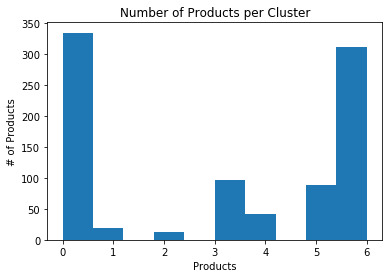

In [93]:
group2c0_prod_per_clust=prodPerCluster(group2c0_df)
group2c0_prod_per_clust

In [94]:
group2c0_dist=clusterDist(group2c0_df)
group2c0_dist

,avgNumOrders,avgRating,numCategories,avgDays_on_sale,avgSpringSales,avgSummerSales,avgFallSales,avgWinterSales
0,237.047761,4.260739,329.0,245.197015,12.725373,15.214925,15.946269,30.495522
1,6522.526316,4.291663,19.0,907.210526,129.684211,199.894737,402.526316,386.315789
2,11589.461538,4.428032,13.0,787.384615,182.384615,103.153846,390.307692,844.923077
3,347.395833,4.289101,96.0,1942.989583,48.760417,49.083333,64.625000,94.885417
4,3485.476190,4.053245,42.0,776.000000,181.190476,204.619048,153.523810,237.261905
5,1628.500000,4.139590,88.0,794.011364,114.113636,138.886364,150.715909,247.784091
6,261.064103,4.276450,310.0,971.842949,21.983974,21.612179,27.913462,49.112179


/Users/laurawilke/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


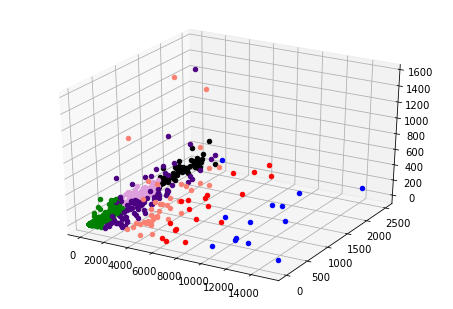

In [96]:
plot=plot3d(group2c0clust, 0, 1, 2, group2c0_df.shape[0])
plot